<a href="https://colab.research.google.com/github/shakshisinghai/Tensorflow_Fashion_MNIST/blob/master/Tensorflow_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow
TensorFlow is a software library or framework, to implement machine learning and deep learning concepts in the easiest manner. 
 
**Important features of TensorFlow −**

1. It includes a feature of that defines, optimizes and calculates mathematical expressions easily with the help of **multi-dimensional arrays called tensors**.
2. It includes a programming support of deep neural networks and machine learning techniques.
3. It includes a high scalable feature of computation with various data sets.
4. TensorFlow uses GPU computing, automating management. It also includes a unique feature of optimization of same memory and the data used.

**Tensors are identified by the following three parameters −**
1. Rank : Unit of dimensionality.
2. Shape : number of rows and columns.
3. Datatype : data type assigned to Tensor’s elements. 


## Keras

**Keras** is compact, easy to learn, high-level Python library run on top of TensorFlow framework.

The creation of freamework can be of the following two types −
1. Sequential API
2. Functional API

Following are the eight steps to create deep learning model in Keras −

1. Loading the data
2. Preprocess the loaded data
3. Definition of model
4. Compiling the model
5. Fit the specified model
6. Evaluate it
7. Make the required predictions
8. Save the model

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import random
import time

In [3]:
mnist=tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Label Description**

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

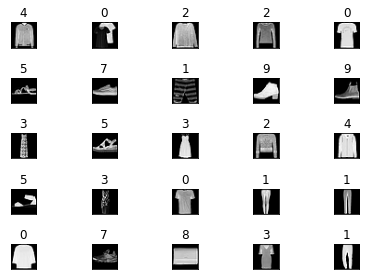

In [45]:

n=5
j=1
rand=[random.randint(1,6000) for i in range(1,n*n+1)]
for i in rand:
  plt.subplot(n,n,j)
  plt.imshow(x_train[i],cmap='gray')
  plt.title("{0}".format( y_train[i]))
  plt.xticks([], [])
  plt.yticks([], [])
  j+=1

plt.tight_layout()

In [4]:
#plt.imshow(x_train[0],  cmap='gray')
print(x_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

##Normalizing the data

Formula: 

```
(x-xmin)/(xmax- xmin)
```
Here all of the values are integers between 0 and 255


In [4]:
x_train=x_train/255.0
x_test=x_test/255.0

**Sequential:** This defines a SEQUENCE of layers in the neural network.

**Flatten:** Remember earlier, our images were a square when they are printed out. Flatten just takes that square and turns it into a one-dimensional vector.

**Dense:** Adds a layer of neurons.

Each layer of neurons needs an activation function to tell them what to do. 


In [5]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                  tf.keras.layers.Dense(512,activation=tf.nn.swish),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax) ])

First compile the model with an optimizer and loss function, then train it on your training data and labels. 

**`metrics=` parameter**  allows TensorFlow to report back about how accurate the training is against the test set.


---


**Callback**
The logs dictionary that callback methods take as argument will contain keys for quantities relevant to the current batch or epoch.

**on_epoch_end: ** Called at the end of an epoch.

In [6]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True


callbacks = myCallback()
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
m=model.fit(x_train, y_train, epochs=10,  callbacks=[callbacks])

              

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4685 - accuracy: 0.8304
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3512 - accuracy: 0.8704
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3119 - accuracy: 0.8838
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2839 - accuracy: 0.8937
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2663 - accuracy: 0.9001
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2479 - accuracy: 0.9068
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2351 - accuracy: 0.9119
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2231 - accuracy: 0.9160
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2106 - accuracy: 0.9203
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.199

In [19]:
# Save the weights
t=str(int(time.time()))
model.save_weights('./drive/My Drive/Colab Notebooks/TrainedData/Fashion_MNIST_'+ t+ '/Fashion_MNIST' )

# Restore the weights
#model.load_weights('./drive/My Drive/Colab Notebooks/TrainedData/Fashion_MNIST_'+ t)


In [22]:
print(m.history)
loss=(m.history['loss'])
accuracy=m.history['accuracy']
epoch=[i for i in range(1,11)]


{'loss': [0.46361351013183594, 0.34835076332092285, 0.30921152234077454, 0.2854595184326172, 0.26581212878227234, 0.24844981729984283, 0.23372164368629456, 0.22110970318317413, 0.20909008383750916, 0.20063674449920654], 'accuracy': [0.8325999975204468, 0.8714166879653931, 0.8849833607673645, 0.8936166763305664, 0.900783360004425, 0.9080666899681091, 0.9115166664123535, 0.917116641998291, 0.9221000075340271, 0.9245833158493042]}


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4142 - accuracy: 0.8878


[0.41421744227409363, 0.8877999782562256]

In [ ]:
pred=model.predict(x_test)
print(pred[0])


[3.8548134e-08 3.0035575e-12 7.7401990e-13 1.9902359e-11 5.2868105e-13
 2.7219181e-07 1.7968137e-12 2.1439570e-07 1.6199863e-15 9.9999952e-01]


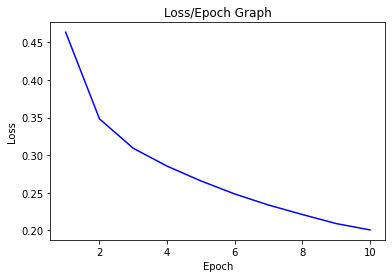

Text(0, 0.5, 'Accuracy')

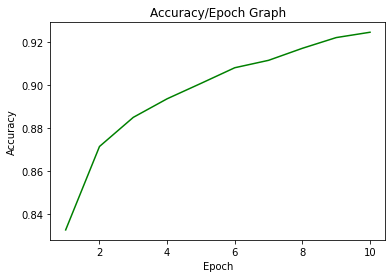

In [36]:

plt.plot(epoch, loss, 'b-')
plt.title("{0}".format( "Loss/Epoch Graph"))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(epoch, accuracy, 'g-')
plt.title("{0}".format( "Accuracy/Epoch Graph"))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")